# Olist - Funil de Marketing

## Importação e exportação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

sns.set_style('white')

In [2]:
import opendatasets as op
dataset = "https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist/code?select=olist_marketing_qualified_leads_dataset.csv"
op.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  alexramos033


Your Kaggle Key:

  ········


100%|████████████████████████████████████████████████████████████████████████████████| 278k/278k [00:00<00:00, 973kB/s]

In [86]:
# Importando arquivos 
closed = pd.read_csv("olist_closed_deals_dataset.csv")

mql = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")

In [87]:
closed.head(2)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0


## ETL

**Tabela Closed**

In [ ]:
# Removendo colunas que não usarei 
closed = closed.drop(columns=["seller_id","sdr_id","sr_id"])
closed = closed.drop(columns=['has_company', 'has_gtin', 'average_stock','declared_product_catalog_size'])

# Mudando tipo de dado
closed["won_date"] = pd.to_datetime(closed["won_date"])
closed.info()

# Removendo celulas VAZIAS
closed.dropna(how='any', inplace=True)

# removendo colunas id 'por exceço de caracteres'
closed = closed.drop(columns="mql_id")

# Add coluna ID 'nova'
id = range(1,843)
id = pd.Series(id)
closed['id'] = id

# Substituindo valores incorretos da coluna lead_behavior
closed["lead_behaviour_profile"] = closed["lead_behaviour_profile"].replace('cat, wolf',"cat")
closed["lead_behaviour_profile"] = closed["lead_behaviour_profile"].replace('eagle, wolf',"eagle")
closed["lead_behaviour_profile"] = closed["lead_behaviour_profile"].replace('shark, cat',"shark")
closed["lead_behaviour_profile"] = closed["lead_behaviour_profile"].replace('eagle, cat',"eagle")
closed["lead_behaviour_profile"] = closed["lead_behaviour_profile"].replace('shark, wolf',"shark");

# Exportando a table já modificada
#closed.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\olist\df_closed.csv', index=False, header=True)
#closed.head(2)

In [34]:
# Antes
closed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [64]:
# Depois
closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 841
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   won_date                  654 non-null    datetime64[ns]
 1   business_segment          654 non-null    object        
 2   lead_type                 654 non-null    object        
 3   lead_behaviour_profile    654 non-null    object        
 4   business_type             654 non-null    object        
 5   declared_monthly_revenue  654 non-null    float64       
 6   id                        654 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 40.9+ KB


**Tabela MQL**

In [11]:
# mudando tipo de dado
mql['first_contact_date'] = pd.to_datetime(mql["first_contact_date"])

# Removendo todos NaN
mql.dropna(how='any', inplace=True)

# removendo colunas 'por exceço de caracteres'
mql = mql.drop(columns="landing_page_id")
mql = mql.drop(columns="mql_id")

# Add coluna ID 
id = range(1,7940)
id = pd.Series(id)
mql['id'] = id

# para exportando tabela
#mql.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\olist\df_mql.csv', index=False, header=True)

In [23]:
# Antes
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [62]:
# Depois
mql.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7940 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   first_contact_date  7940 non-null   datetime64[ns]
 1   origin              7940 non-null   object        
 2   id                  7879 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 248.1+ KB


## Modelagem 

Aqui tem um problema: 

    As tabelas tem estruturas diferentes em numero de linhas e quatidade de colunas, o que significa que NÃO e possivel realizar uma junção de tabelas e não sofrer com perda de dados. 
    
    Diante disso a solução encontrada e realizar uma modelagem das tabelas em um banco de dados usando uma tabela externa para re-estruturar as tabelas e após importar novamente ao python.

## Analise

In [2]:
# Importando os dados
dados = pd.read_csv("olist_mark.csv")

# mudando tipo de dado
dados['tempo'] = pd.to_datetime(dados["tempo"])
dados['first_contact_Date'] = pd.to_datetime(dados["first_contact_Date"])
dados['won_date'] = pd.to_datetime(dados["won_date"])

# add colunas de não repetição
dados["c_mql"] = dados["id_mql"].drop_duplicates()
dados["c_close"] = dados["id_close"].drop_duplicates()

# extraindo colunas
dados["year"] = pd.DatetimeIndex(dados["tempo"]).year
dados["year2"] = pd.DatetimeIndex(dados["first_contact_Date"]).year
dados["month2"] = pd.DatetimeIndex(dados["first_contact_Date"]).month
dados["month"] = pd.DatetimeIndex(dados["tempo"]).month
dados["week"] = pd.DatetimeIndex(dados["tempo"]).week
dados["quate"] = pd.DatetimeIndex(dados["tempo"]).quarter

C:\Users\ramos\AppData\Local\Temp\ipykernel_2404\1389285381.py:18: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dados["week"] = pd.DatetimeIndex(dados["tempo"]).week


In [38]:
dados.head()

,id_mql,id_close,origin,tempo,business_segmento,lead_behavior,business_type,first_contact_Date,won_date,contato_primeiro_ate_fechamento,c_mql,c_close,year,year2,month2,month,week,quate
0,1,57,social,2018-02-26,pet,cat,reseller,2018-02-01,2018-02-26,-25.0,1.0,57.0,2018,2018.0,2.0,2,9,1
1,1,56,social,2018-02-26,pet,cat,reseller,2018-02-01,2018-02-26,-25.0,NaN,56.0,2018,2018.0,2.0,2,9,1
2,1,55,social,2018-02-26,pet,cat,reseller,2018-02-01,2018-02-26,-25.0,NaN,55.0,2018,2018.0,2.0,2,9,1
3,1,54,social,2018-02-26,pet,cat,reseller,2018-02-01,2018-02-26,-25.0,NaN,54.0,2018,2018.0,2.0,2,9,1
4,1,53,social,2018-02-26,pet,cat,reseller,2018-02-01,2018-02-26,-25.0,NaN,53.0,2018,2018.0,2.0,2,9,1


## Quantitativo

### Quantas Leads converteram de MQL para Cliente?

O valor percentual do numero de leads e de 74% o claramente e um altissimo numero de retenção dos possiveis clientes.

*Demonstrando claramente a eficiente do time de marketing inbound, já que maior parte dos leads vieram do site.*

In [25]:
# Numeto total de leads
leads = dados["c_mql"].count()

# Empresas se tornaram oportunidades
clientes = dados["c_close"].count()

# MQL p/ lead valor %
num_lead_perc = round(clientes / leads,2)

In [22]:
leads

5415

In [23]:
clientes

3982

In [26]:
num_lead_perc

0.74

## Tempo

### Quantos leads por ano? 

Temos um numero de leads em 2017 de 817 leads, já em 2018 tem o assombraso numero de 4598 leads. O que e um valor explosivo 
em relação ao ano anterior. 

Mas oque levou a isso? 
    1° A data inicial do ano de 2017 se iniciou em Julho,
    2° Como estamos falando de outbound, o as tecninas de obtenção de leads são demoradas tendo 
       um efeito de meses após se iniciado a campanha.

In [12]:
ano = dados.groupby(["year2"])["c_mql"].count().reset_index()
ano

,year2,c_mql
0,2017.0,817
1,2018.0,4598


### Quanto leads por mês?

Temos uma variação de bem grande do numero de leads mensal, sendo que o mês como menor valor e o 11 com 135 lead, já o com maior valor e o 4 com 916 leads e uma edia de 541 leads mês.

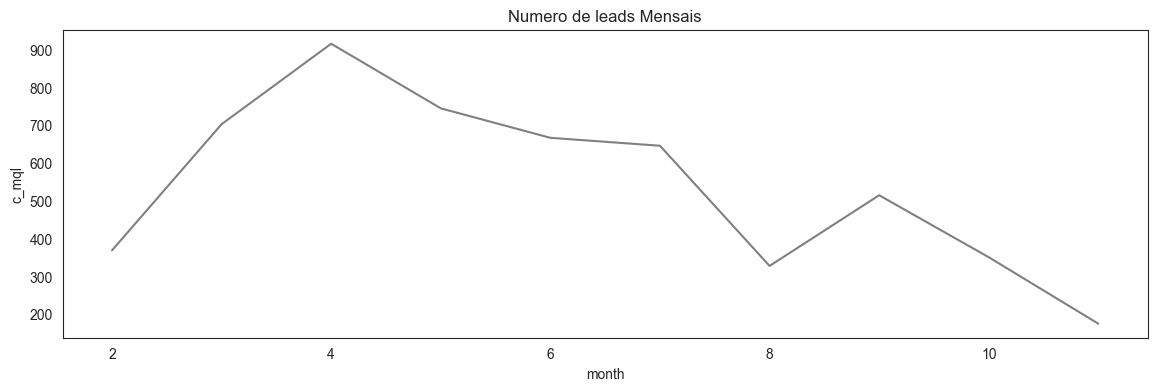

In [9]:
# dados
mes = dados.groupby(["month"])["c_mql"].count().reset_index()
mes.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\Olist\mes.csv') 

# grafico 
fig, ax = plt.subplots(figsize=(14,4))
sns.lineplot(x="month", y="c_mql", data=mes, color='gray').set_title("Numero de leads Mensais");

### Quantos leads por semana?

Temos uma media de 132 leads por semana, sendo que a semana que menos obteve leads foi n° 6 com apenas 31 leads e a que 
mais obteve leads n° 46 com 269 leads.

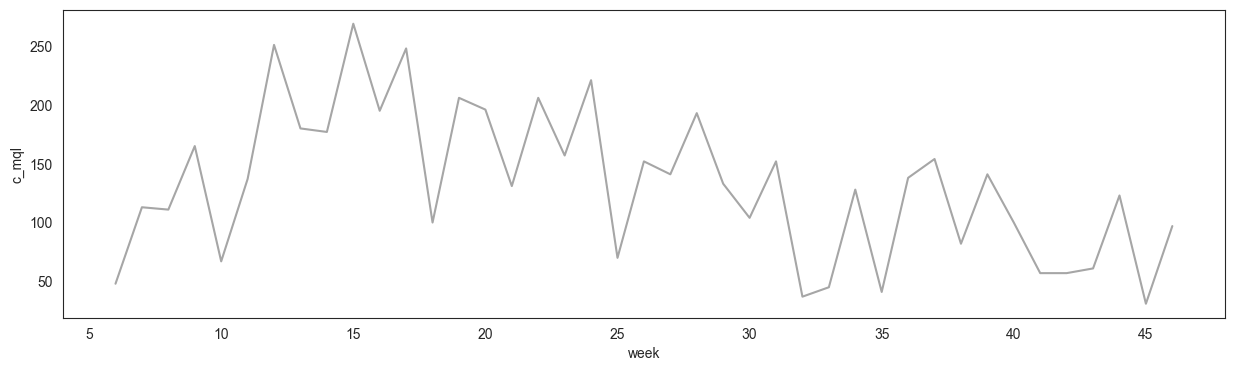

In [161]:
# dados
semana = dados.groupby(["week"])["c_mql"].count().reset_index()

# grafico
fig, ax = plt.subplots(figsize=(15,4))
sns.lineplot(x="week", y="c_mql", data=semana, errorbar=None, color="gray", alpha=0.7);

### Quantos dias do primeiro contato ate o fechamento?

A media de dias ate a conquista do cliente de fato e de 107 dias, sendo o menor tempo de 73 dias e o maior de 440 dias.

Graficamento concluimos que a maior parte dos clientes demoram certa de 100 dias para ser torna cliente.

In [95]:
# Construção do df de datas ref. ao contato
data_primeira_ate_fechamento = dados[["id_close","first_contact_Date","won_date","contato_primeiro_ate_fechamento"]]
data_primeira_ate_fechamento = (data_primeira_ate_fechamento
                                .sort_values(by="won_date",ascending=True)
                                .drop_duplicates())

# Mudando valor negativos da col. "contato.." para positivo
data_primeira_ate_fechamento["contato_ate_fechamento"] = data_primeira_ate_fechamento["contato_primeiro_ate_fechamento"] * - 1
data_primeira_ate_fechamento

data_primeira_ate_fechamento.head()
data_primeira_ate_fechamento.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\Olist\data_primeira_ate_fechamento.csv') 

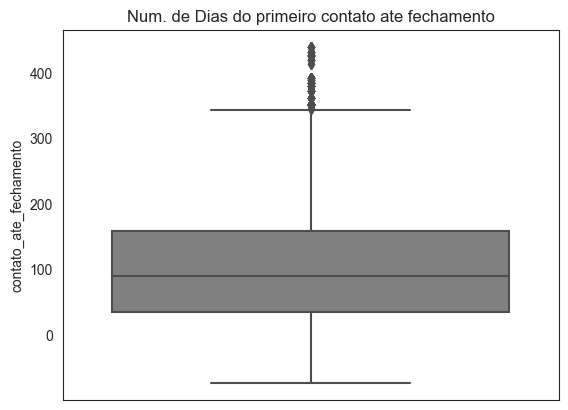

In [96]:
# grafico
sns.boxplot(y = data_primeira_ate_fechamento["contato_ate_fechamento"], color='gray').set_title("Num. de Dias do primeiro contato ate fechamento");

## Demografico

### Quais canais de origem mais geraram leads?

Os canais com maior quantidade de leads geradas e o:
    1° Pesquisa organica com um 1500 leads,
    2° Pesquisa paga 1100 leads. 

Os demais rede sociais e email, estão abaixo de 800 leads gerados.

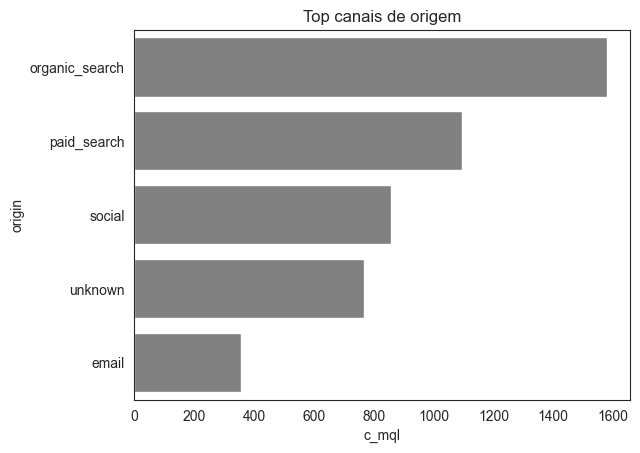

In [6]:
# Estrutura
canais = dados.groupby(["origin"])["c_mql"].count().sort_values(ascending=False).reset_index()
canais["mql_%"] = round(canais["c_mql"] / canais["c_mql"].sum(),2)
canais.head(5)

#Grafico
sns.barplot(x="c_mql", y="origin", data=canais.head(5), color='gray').set(title='Top canais de origem');
# plt.savefig('top_canais.png')

#dfi.export(canais, 'canais.png')
# canais.to_csv('canais.csv', sep=',',index=False, encoding='utf-8' )

### Quais os top 10 segmentos de cliente?

Dos 10 primeiros segmentos o top 3 são decoração de casa 553 leads, saude/beleza 483 leads e 
acessorios de carro com 462 leads respectivamente.

In [6]:
segmentos = (dados.groupby(["business_segmento"])["c_mql"]
             .count()
             .sort_values(ascending=False)
             .reset_index()
             .head(10))
segmentos

,business_segmento,c_mql
0,household_utilities,639
1,home_decor,631
2,car_accessories,602
3,construction_tools_house_garden,479
4,audio_video_electronics,478
5,health_beauty,451
6,pet,232
7,home_appliances,212
8,computers,187
9,sports_leisure,168


### Quais top 10 segmentos por tipo de cliente

Dos grupos temos diversos subgrupos, mas os principais de cada grupos é 
    Revendedores party, perfume e consoles de games,
    Manufaturados instrumentos de musica, artesanato e acessorios de moda. 

Importante: Como um segmento tem diversos subgrupos. O que sig. que o valor e distribuido pelo num. total de leads e 
            podemos ter leads com mais de um subgrupo.

In [10]:
# Estrutura das subdivisões por segmento
sub_segm = pd.pivot_table(dados, values="c_close", index=["business_segmento"], columns=["business_type"])

# Subdivisões dos revendedores
sub_rev = round(sub_segm["reseller"].sort_values(ascending=False).reset_index(),2)
sub_rev.head(4)

,business_segmento,reseller
0,party,3521.0
1,perfume,3347.5
2,games_consoles,2919.5
3,handcrafted,2509.5


In [43]:
# Subdivisões dos manufaturados
sub_rev = round(sub_segm["manufacturer"].sort_values(ascending=False).reset_index(),2)
sub_rev.head(4)

,business_segmento,manufacturer
0,music_instruments,3599.50
1,handcrafted,2924.67
2,fashion_accessories,2745.83
3,audio_video_electronics,2608.10


### Quais comportamentos de clientes mais comuns?

O Comportamento mais comum e o de 'cão' com mais de 2500 fechamento, sendo que esse comportamento quase 3x
mais fechamento e o segundo que e o de 'aguia' com menos de 1000 fechamento.

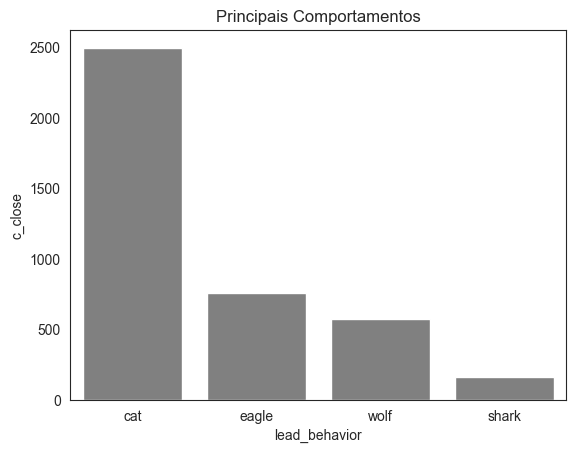

In [3]:
# Estrutura
comportamentos = (
                dados.groupby(["lead_behavior"])['c_close']
                .count()
                .sort_values(ascending=False)
                .reset_index())
comportamentos["d_close"] = round(comportamentos["c_close"] / comportamentos["c_close"].sum(),2)
comportamentos

# Grafico
sns.barplot(y="c_close",x="lead_behavior", data=comportamentos, color='gray').set(title='Principais Comportamentos');

### Quais tipos de clientes mais comuns?

O principal tipo/grupo de lead e o de revenda com mais de 2500 leads, e em seguida o manufatura com 1200 leads.

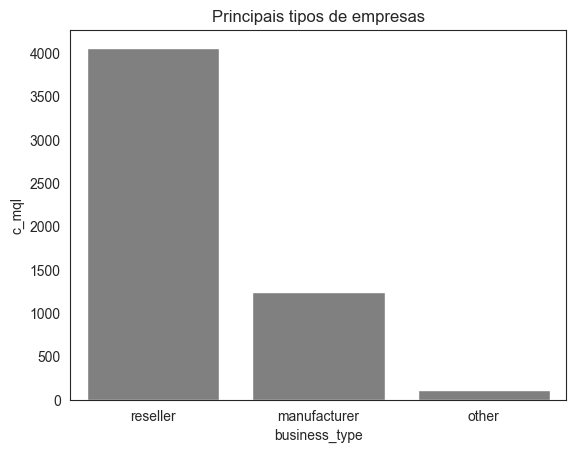

In [6]:
# estrutura
leads = (dados.groupby(["business_type"])["c_mql"]
             .count()
             .sort_values(ascending=False)
             .reset_index())
leads["c_mql %"] = round(leads["c_mql"] / leads["c_mql"].sum(),2)

# Grafico
sns.barplot(x="business_type", y="c_mql", data=leads, color="gray").set_title("Principais tipos de empresas");

## Porque da explosão do numero de leads no mês 2 ao 4?

### Temos uma mudança nas fontes de leads?

Não, as princpais fontes de dados para o nivel MQL não mudou, só o nivel percentual de obtenção. 

Sendo Pesquisa Organica 32%, Pesquisa Paga 19% e Redes Sociais 17%.

In [16]:
# Dados'limitando aos meses que desejo'
d1 = dados[dados["month"] >= 2] 
d2 = d1[d1["month"] < 4]

# Estrutura origem
f_df = d2.groupby(["origin"])["c_mql"].count().sort_values(ascending=False).reset_index()
f_df["mql_%"] = round(f_df["c_mql"] / f_df["c_mql"].sum(),2)
f_df

,origin,c_mql,mql_%
0,organic_search,339,0.32
1,paid_search,200,0.19
2,social,184,0.17
3,unknown,156,0.15
4,email,68,0.06
5,direct_traffic,52,0.05
6,referral,30,0.03
7,other,19,0.02
8,display,13,0.01
9,other_publicities,11,0.01


#### Temos uma mudança das fontes no nivel close?

No caso no proximo nivel/etada do funil de marketing, temos sim uma mudança dos principais canais de obtenção de leads.

Sendo Redes Socias 29%, Pesquisa Organica 24%, Pesquisa Paga 18%.

In [17]:
# Dados'limitando aos meses que desejo'
d1 = dados[dados["month"] >= 2] 
d2 = d1[d1["month"] < 4]

# Estrutura origem
f_df = d2.groupby(["origin"])["c_close"].count().sort_values(ascending=False).reset_index()
f_df["close_%"] = round(f_df["c_close"] / f_df["c_close"].sum(),2)
f_df

,origin,c_close,close_%
0,social,320,0.29
1,organic_search,260,0.24
2,paid_search,201,0.18
3,unknown,104,0.09
4,direct_traffic,76,0.07
5,display,72,0.07
6,email,55,0.05
7,referral,10,0.01
8,other,0,0.00
9,other_publicities,0,0.00


### Temos uma mudança do tipo de lead?

Não, não temos uma mudança do tipo predominantes de lead durante o periodo de explosão.

In [20]:
d1 = dados[dados["month"] >= 2] 
d2 = d1[d1["month"] < 4]

tipo = (d1.groupby(["business_type"])["c_mql"]
             .count()
             .sort_values(ascending=False)
             .reset_index())
tipo["c_mql %"] = round(tipo["c_mql"] / tipo["c_mql"].sum(),2)
tipo

,business_type,c_mql,c_mql %
0,reseller,4062,0.75
1,manufacturer,1238,0.23
2,other,115,0.02


### Temos uma mudança no Segmento do lead?

Sim, temos mudança de posicionamento do segmento de lead sendo antes os principais Heath, Car acessorioes e Perfume. E 
agora são Ferramentas de construção de jardim, Decoração de Casa e Acessorios de Saude e beleza.

In [17]:
d1 = dados[dados["month"] >= 2] 
d2 = d1[d1["month"] < 4]

segmentos = (d2.groupby(["business_segmento"])["c_close"]
             .count()
             .sort_values(ascending=False)
             .reset_index()
             .head(10))
segmentos

,business_segmento,c_close
0,construction_tools_house_garden,160
1,home_decor,140
2,health_beauty,119
3,household_utilities,112
4,car_accessories,112
5,audio_video_electronics,84
6,pet,54
7,sports_leisure,42
8,food_supplement,30
9,food_drink,30


In [ ]:
d1 = dados[dados["month"] >= 2] 
d2 = d1[d1["month"] <= 4]

# Estrutura das subdivisões por segmento
sub_segm = pd.pivot_table(d2, values="c_close", index=["business_segmento"], columns=["business_type"])

# Subdivisões dos revendedores
sub_rev = round(sub_segm["manufacturer"].sort_values(ascending=False).reset_index(),2)
sub_rev.head(4)

,business_segmento,manufacturer
0,small_appliances,3123.00
1,audio_video_electronics,2285.83
2,toys,2264.50
3,fashion_accessories,2179.50


### Temos uma mudança no comportamento do lead?

Temos uma variação de comportamentos, mas no geral o mais incomum e o Wolf que teve uma grande 
queda no mês 3. Fora esse os demais tiveram um continuo crescimento nesse periodol.

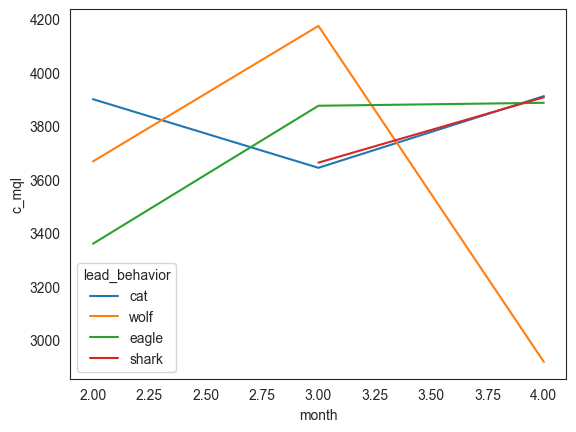

In [36]:
a1 = dados[dados["month"] >= 2]
a2 = a1[a1["month"] <= 4]

sns.lineplot(x="month", y="c_mql", data=a2, hue="lead_behavior", errorbar=None, palette="tab10");

#### Temos uma mudança de comportamento no nivel Close?

Já no proximo nivel tivemos uma grande e rapida subida, mas ao mesmo tempo uma grande descida 
em absolutamente TODOS os comportamentos.

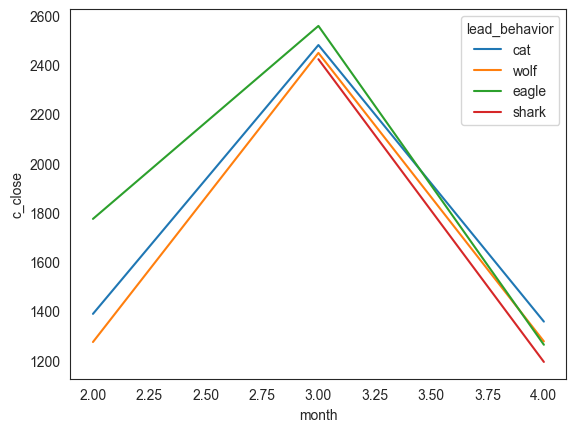

In [37]:
a1 = dados[dados["month"] >= 2]
a2 = a1[a1["month"] <= 4]

sns.lineplot(x="month", y="c_close", data=a2, hue="lead_behavior", errorbar=None, palette="tab10");

# Porque temos uma queda no mumero de lead no mês 7 ao 10?

### Temos mudanças nas fontes nesse periodo?

Não, o que indica que a mudança de comportamento não pode ser identificado pelas principais
fontes de dados especificamento. Isso é o top 3 continuar o mesmo nesse periodo.

In [72]:
f = dados[dados["month"] >= 7]
f1 = f[f["month"] <= 10]

f1.groupby(["origin"])["c_mql"].count().sort_values(ascending=False).reset_index().head()

,origin,c_mql
0,organic_search,522
1,paid_search,398
2,social,263
3,unknown,252
4,email,122


#### Temos mudança de fonte no nivel Close?

Já nesse nivel tivemos apenas UM mudança de posição, no qual a rede social ficou acima de 
pesquisa paga.

In [54]:
f = dados[dados["month"] >= 7]
f1 = f[f["month"] <= 10]

f1.groupby(["origin"])["c_close"].count().sort_values(ascending=False).reset_index().head()

,origin,c_close
0,organic_search,174
1,social,122
2,paid_search,80
3,unknown,72
4,email,67


### Temos mudança do tipo de lead?

Não, não temos uma mudança.

In [42]:
f = dados[dados["month"] >= 7]
f1 = f[f["month"] <= 10]

tipo = (f1.groupby(["business_type"])["c_mql"]
             .count()
             .sort_values(ascending=False)
             .reset_index())
tipo["c_mql %"] = round(tipo["c_mql"] / tipo["c_mql"].sum(),2)
tipo

,business_type,c_mql,c_mql %
0,reseller,1387,0.75
1,manufacturer,453,0.25


### Temos mudança do segmento do lead?

Sim, temos uma mudança grande dos segmentos que anteriormente dominavam as principais 
posições por numero de lead. 

Sendo agora Decoração de casa em 1° lugar e o unico que repitiu, videos eletronicos em 2°
e em 3° ferramentas para jardinagem de casa.

In [ ]:
f = dados[dados["month"] >= 7]
f1 = f[f["month"] <= 8]

segmentos = (f1.groupby(["business_segmento"])["c_mql"]
             .count()
             .sort_values(ascending=False)
             .reset_index())
segmentos.head()

,business_segmento,c_mql
0,audio_video_electronics,180
1,home_decor,133
2,health_beauty,124
3,small_appliances,89
4,home_appliances,75


### Temos mudança no comportamento do lead?

Tivemos uma constancia e ate aumento do comportamento CAT e WOLF. Mas, de forma visivel 
tambem uma queda nos comportamentos SHARK e EAGLE.

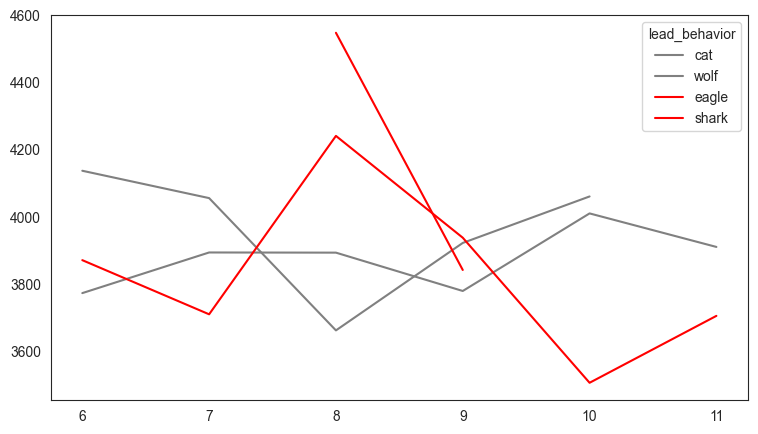

In [69]:
f = dados[dados["month"] >= 6]
f1 = f[f["month"] <= 11]
#f1.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\Olist\f2.csv') 


fig, ax = plt.subplots(figsize=(9,5))
ax = sns.lineplot(x="month", y="c_mql", data=f1, hue="lead_behavior", errorbar=None, palette=["gray","gray","red","red"])
ax.set(xlabel=None)
ax.set(ylabel=None);

#### Temos uma mudança de comportamento no nivel Close?

Assim, como no nivel mql tivemos um aumento do numero de lead para o comportamento de CAT e WOLF,
e uma grande queda do comportamento SHARK e EAGLE

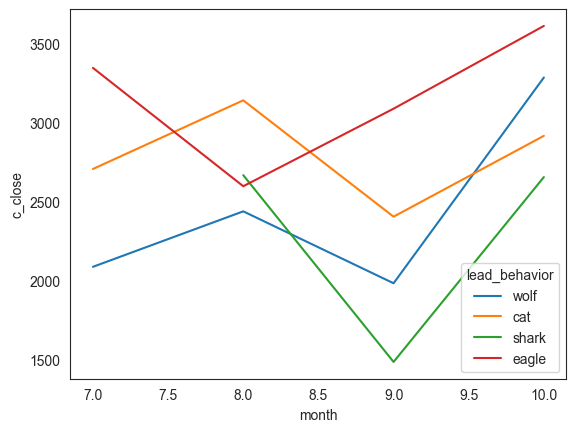

In [46]:
f = dados[dados["month"] >= 7]
f1 = f[f["month"] <= 10]

sns.lineplot(x="month", y="c_close", data=f1, hue="lead_behavior", errorbar=None, palette="tab10");

# O que mudou com a queda e aumento de lead?

### O tempo medio para o ganho/evolução do lead

Tivemos uma grande diferença quando diz respeito ao tempo do primeiro contato do lead com 
a olist, ate o momento do ganho ou mesmo de evolução mudado drasticamente nesses 2 periodos. 

No periodo de crescimento tivemos uma media de 38 dias, já no periodo de queda uma media de 182 dias.Isso, 
e uma diferença de ate 150 dias ou 3x maior que no periodo anterior.

In [120]:
d1 = dados[dados["month"] >= 7] 
d2 = d1[d1["month"] <= 10]

# Construção do df de datas ref. ao contato
data_primeira_ate_fechamento = d2[["id_close","first_contact_Date","won_date","contato_primeiro_ate_fechamento"]]
data_primeira_ate_fechamento = (data_primeira_ate_fechamento
                                .sort_values(by="won_date",ascending=True)
                                .drop_duplicates())

# Mudando valor negativos da col. "contato.." para positivo
data_primeira_ate_fechamento["contato_ate_fechamento"] = data_primeira_ate_fechamento["contato_primeiro_ate_fechamento"] * - 1
data_primeira_ate_fechamento.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\Olist\df.csv') 

In [121]:
q1 = dados[dados["month"] >= 2] 
q2 = q1[q1["month"] <= 4]

# Construção do df de datas ref. ao contato
data_primeira_ate_fechamento = q2[["id_close","first_contact_Date","won_date","contato_primeiro_ate_fechamento"]]
data_primeira_ate_fechamento = (data_primeira_ate_fechamento
                                .sort_values(by="won_date",ascending=True)
                                .drop_duplicates())

# Mudando valor negativos da col. "contato.." para positivo
data_primeira_ate_fechamento["contato_ate_fechamento"] = data_primeira_ate_fechamento["contato_primeiro_ate_fechamento"] * - 1
data_primeira_ate_fechamento.to_csv(r'C:\Users\ramos\Desktop\Studio Analise Dados\My Own\BI project\Olist\df0.csv') 

<AxesSubplot: ylabel='contato_ate_fechamento'>

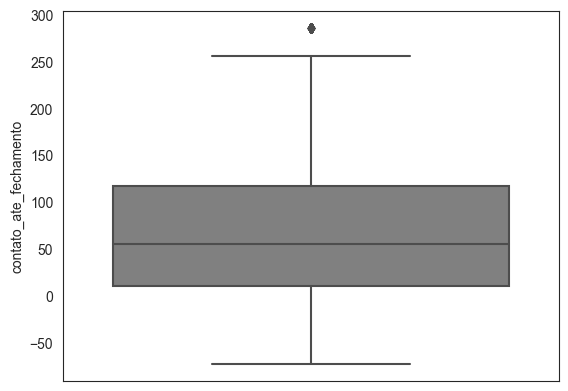

In [108]:
sns.boxplot(y = data_primeira_ate_fechamento["contato_ate_fechamento"], color='gray')

<AxesSubplot: ylabel='contato_ate_fechamento'>

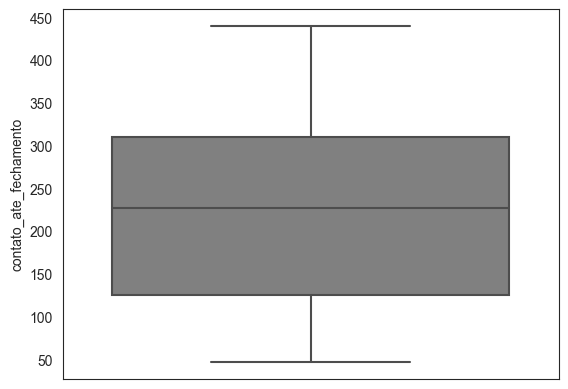

In [115]:
sns.boxplot(y = data_primeira_ate_fechamento["contato_ate_fechamento"], color='gray')

# Conclusão

### Descobertas 

Temos uma queda do número de leads que acarreta em uma lentidão ou prejuízo financeiro ou produtivo de até 3x se não identificado cedo. 

### Solução
E Para ser capaz de não sofrer tamanho danos foi definido KPI’S de acompanhamento e a definição de novos perfis, sendo 
os perfils:

1° Perfil - Crescimento

•	As fontes no nivel Close: Redes Sociais, Pesquisa Orgânica e Pesquisa Paga,

•	Os segmentos: Ferramentas de construção de jardim, Decoração de Casa e acessórios de Saude e beleza,

•	Os comportamentos: Queda Wolf e aumento do Cat, Eagle e Shark.
 
2° Perfil - Queda

•	As fontes no nivel Close: Pesquisa Orgânica, Redes Sociais e Pesquisa Paga,

•	Os segmentos: Ferramentas de Decoração de Casa, Video eletrônico e Jardinagem

•	Os comportamentos: Queda Shark e Eagle e aumento Cat e Wolf.
